

# WAP to match the given input pattern. use euceidean distance. the output should be like:
# enter no. of patterns
# enter no. of elements in each pattern
# enter stored patterns: pattern 1 2 AND 3
# enter input pattern
# Euclidea distanceto each pattern

### WAP to match the given input pattern. use euceidean distance. enter no. of patters=3 enter no of elements in, enter input patterns euclidean distance 1 2 3
### Enter input patterns euclidean distance to 1 2 3

In [4]:
import math

# Function to calculate Euclidean distance
def euclidean_distance(p1, p2):
    return math.sqrt(sum((a - b) ** 2 for a, b in zip(p1, p2)))

# Input number of patterns
n = int(input("Enter number of patterns: "))

patterns = []
for i in range(n):
    elements = list(map(int, input(f"Enter elements of pattern {i+1} (space-separated): ").split()))
    patterns.append(elements)

# Display distances
print("\nEuclidean Distance Matrix:")
for i in range(n):
    for j in range(n):
        dist = euclidean_distance(patterns[i], patterns[j])
        print(f"{dist:.2f}", end="  ")
    print()

Enter number of patterns:  3
Enter elements of pattern 1 (space-separated):  1 4 7
Enter elements of pattern 2 (space-separated):  2 5 7
Enter elements of pattern 3 (space-separated):  8 9 0



Euclidean Distance Matrix:
0.00  1.41  11.09  
1.41  0.00  10.05  
11.09  10.05  0.00  


### WAP to compute the mahalobnis distacebetween polyons. add some epslon value for stability , enter no of vertices for the polyl vertex 1 2 3 4 = 00 10 20 22 etc for the polythen results: centroid then covariance

Enter number of vertices for Polygon A:  4
Polygon A - Enter vertex 1 (x y):  2 3
Polygon A - Enter vertex 2 (x y):  3 5
Polygon A - Enter vertex 3 (x y):  6 7
Polygon A - Enter vertex 4 (x y):  2 3
Enter number of vertices for Polygon B:  4
Polygon B - Enter vertex 1 (x y):  7 8
Polygon B - Enter vertex 2 (x y):  9 0
Polygon B - Enter vertex 3 (x y):  0 9
Polygon B - Enter vertex 4 (x y):  7 8



Polygon A Centroid: [3.25 4.5 ]
Polygon B Centroid: [5.75 6.25]
Distance between centroids: 3.0516389039334255

Mahalanobis distances for Polygon A vertices:
Vertex A1: 0.8660
Vertex A2: 1.5000
Vertex A3: 1.5000
Vertex A4: 0.8660

Mahalanobis distances for Polygon B vertices:
Vertex B1: 0.8660
Vertex B2: 1.5000
Vertex B3: 1.5000
Vertex B4: 0.8660


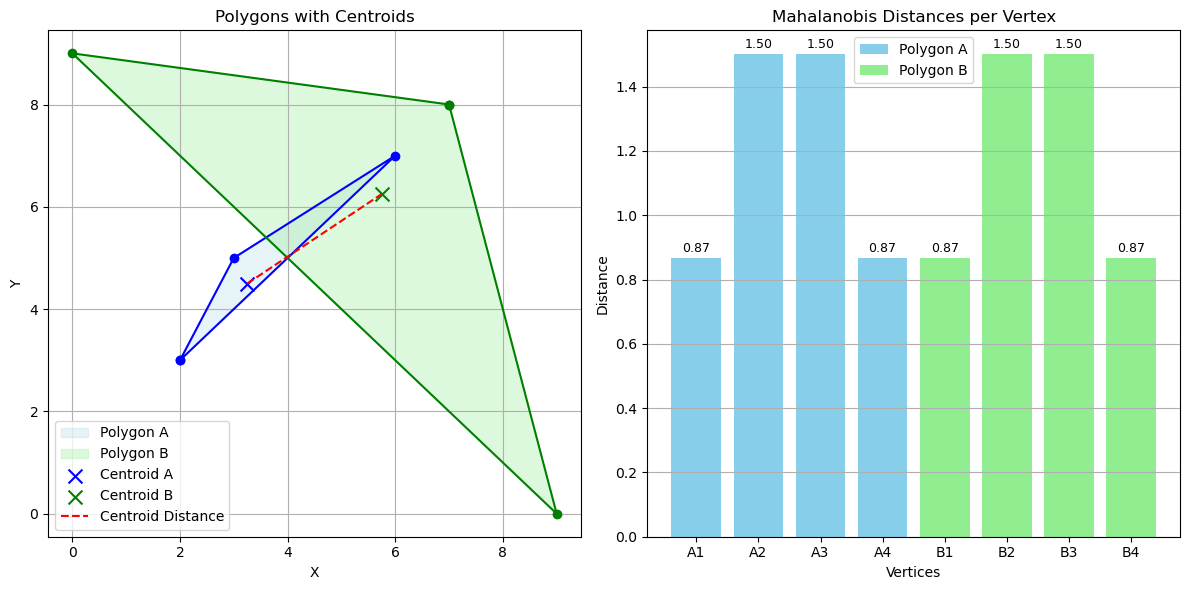

In [14]:
import numpy as np
import matplotlib.pyplot as plt

def mahalanobis_distance(points, epsilon=1e-6):
    X = np.array(points)
    centroid = np.mean(X, axis=0)
    cov_matrix = np.cov(X.T)
    cov_matrix += epsilon * np.eye(cov_matrix.shape[0])  # stability
    inv_cov = np.linalg.inv(cov_matrix)

    distances = []
    for p in X:
        diff = p - centroid
        dist = np.sqrt(np.dot(np.dot(diff.T, inv_cov), diff))
        distances.append(dist)
    return centroid, cov_matrix, distances


# -------------------------------
# Input for Polygon A
# -------------------------------
n1 = int(input("Enter number of vertices for Polygon A: "))
pointsA = []
for i in range(n1):
    x, y = map(float, input(f"Polygon A - Enter vertex {i+1} (x y): ").split())
    pointsA.append([x, y])

# -------------------------------
# Input for Polygon B
# -------------------------------
n2 = int(input("Enter number of vertices for Polygon B: "))
pointsB = []
for i in range(n2):
    x, y = map(float, input(f"Polygon B - Enter vertex {i+1} (x y): ").split())
    pointsB.append([x, y])

# -------------------------------
# Compute centroids and distances
# -------------------------------
centroidA, covA, distA = mahalanobis_distance(pointsA)
centroidB, covB, distB = mahalanobis_distance(pointsB)

# Euclidean distance between centroids
centroid_distance = np.linalg.norm(centroidA - centroidB)

print("\nPolygon A Centroid:", centroidA)
print("Polygon B Centroid:", centroidB)
print("Distance between centroids:", centroid_distance)
print("\nMahalanobis distances for Polygon A vertices:")
for i, d in enumerate(distA, 1):
    print(f"Vertex A{i}: {d:.4f}")
print("\nMahalanobis distances for Polygon B vertices:")
for i, d in enumerate(distB, 1):
    print(f"Vertex B{i}: {d:.4f}")

# -------------------------------
# Graphs
# -------------------------------
pointsA = np.array(pointsA)
pointsB = np.array(pointsB)

plt.figure(figsize=(12,6))

# Graph 1: Polygons with centroids
plt.subplot(1,2,1)
plt.fill(pointsA[:,0], pointsA[:,1], alpha=0.3, color='lightblue', label="Polygon A")
plt.plot(pointsA[:,0], pointsA[:,1], 'bo-')
plt.fill(pointsB[:,0], pointsB[:,1], alpha=0.3, color='lightgreen', label="Polygon B")
plt.plot(pointsB[:,0], pointsB[:,1], 'go-')
plt.scatter(*centroidA, color='blue', marker='x', s=100, label="Centroid A")
plt.scatter(*centroidB, color='green', marker='x', s=100, label="Centroid B")
plt.plot([centroidA[0], centroidB[0]], [centroidA[1], centroidB[1]], 'r--', label="Centroid Distance")
plt.title("Polygons with Centroids")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.grid(True)

# Graph 2: Mahalanobis distances
plt.subplot(1,2,2)
indicesA = [f"A{i}" for i in range(1, n1+1)]
indicesB = [f"B{i}" for i in range(1, n2+1)]
plt.bar(indicesA, distA, color='skyblue', label="Polygon A")
plt.bar(indicesB, distB, color='lightgreen', label="Polygon B")
for i, d in enumerate(distA):
    plt.text(i, d+0.02, f"{d:.2f}", ha='center', fontsize=9)
for i, d in enumerate(distB, start=len(distA)):
    plt.text(i, d+0.02, f"{d:.2f}", ha='center', fontsize=9)
plt.title("Mahalanobis Distances per Vertex")
plt.xlabel("Vertices")
plt.ylabel("Distance")
plt.legend()
plt.grid(axis='y')

plt.tight_layout()
plt.show()
